In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(8, 8)})
sns.set_style("darkgrid")

# Input filename

In [2]:
in_filename = 'results.csv'

# Read in data

In [3]:
in_filename = './sample_data/' + in_filename

In [4]:
df = pd.read_csv(in_filename)
df

,NumRows,Device,Task,Time (seconds)
0,500000,CPU,Load data,0.3540
1,500000,CPU,Write date,1.1200
2,500000,CPU,Describe dataframe,0.0539
3,500000,CPU,Set index on dataframe,0.0502
4,500000,CPU,Concat multiple dataframes,0.0855
...,...,...,...,...
145,20000000,GPU,OLS Regression,0.1960
146,20000000,GPU,Logistic Regression,8.7000
147,20000000,GPU,K-Means,2.4800
148,20000000,GPU,Random Forest Classifier,13.8000


In [5]:
df['Task'].unique()

array(['Load data', 'Write date', 'Describe dataframe',
       'Set index on dataframe', 'Concat multiple dataframes',
       'Groupby aggregation (mean)', 'Fit label encoder', 'Encode data',
       'Scale data', 'split data', 'OLS Regression',
       'Logistic Regression', 'K-Means', 'Random Forest Classifier',
       'Gradient Boosting'], dtype=object)

# Calculate and plot total times
Also saves the plot in the plots folder

In [6]:
total_times = df.groupby(['NumRows', 'Device']).sum()['Time (seconds)'].reset_index()
total_times['Time (seconds)'] = total_times['Time (seconds)'].round(1)

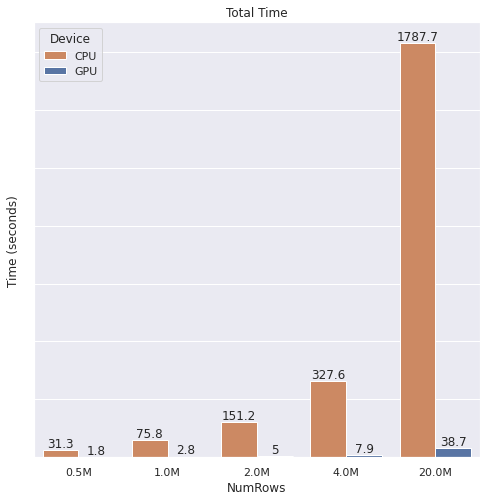

In [7]:
fig = sns.barplot(data=total_times, x='NumRows', y='Time (seconds)', hue='Device', palette=["C1", "C0"])
for container in fig.containers:
    fig.bar_label(container)
fig.set(yticklabels=[])
fig.set_title("Total Time")
xlabels = [f'{x}M' for x in df['NumRows'].unique()/1000000]
fig.set_xticklabels(xlabels)
plt.savefig("./plots/total_time.png", bbox_inches='tight')

# Calculate and plot ETL times
Also saves the plot in the plots folder

In [8]:
etl_tasks = [
    'Load data',
    'Write date', 
    'Describe dataframe',
    'Set index on dataframe', 
    'Concat multiple dataframes',
    'Groupby aggregation (mean)', 
    'Fit label encoder', 
    'Encode data',
    'Scale data', 
    'split data',
]

In [9]:
etl_df = df.set_index('Task').loc[etl_tasks].reset_index()
etl_times = etl_df.groupby(['NumRows', 'Device']).sum()['Time (seconds)'].reset_index()
etl_times['Time (seconds)'] = etl_times['Time (seconds)'].round(1)

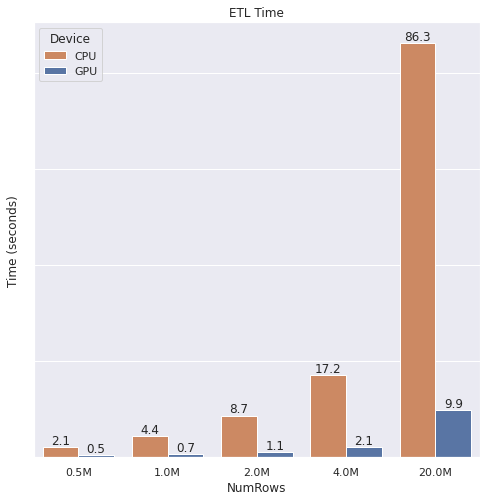

In [10]:
fig = sns.barplot(data=etl_times, x='NumRows', y='Time (seconds)', hue='Device', palette=["C1", "C0"])
for container in fig.containers:
    fig.bar_label(container)
fig.set(yticklabels=[])
fig.set_title("ETL Time")
xlabels = [f'{x}M' for x in df['NumRows'].unique()/1000000]
fig.set_xticklabels(xlabels)
plt.savefig("./plots/etl_time.png", bbox_inches='tight')

# Calculate and plot ML times
Also saves the plot in the plots folder

In [11]:
ml_tasks = [
    'OLS Regression',
    'Logistic Regression', 
    'K-Means', 
    'Random Forest Classifier',
    'Gradient Boosting',
]

In [12]:
ml_df = df.set_index('Task').loc[ml_tasks].reset_index()
ml_times = ml_df.groupby(['NumRows', 'Device']).sum()['Time (seconds)'].reset_index()
ml_times['Time (seconds)'] = ml_times['Time (seconds)'].round(1)

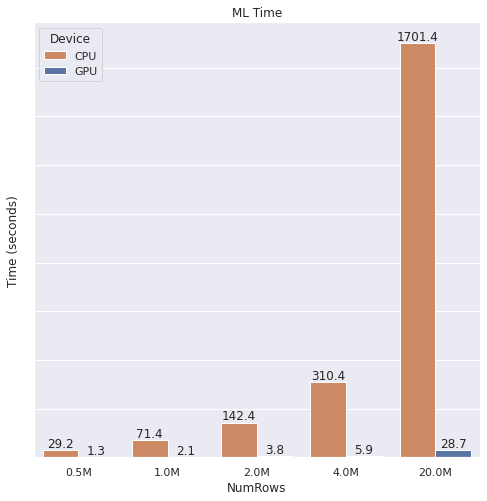

In [13]:
fig = sns.barplot(data=ml_times, x='NumRows', y='Time (seconds)', hue='Device', palette=["C1", "C0"])
for container in fig.containers:
    fig.bar_label(container)
fig.set(yticklabels=[])
fig.set_title("ML Time")
xlabels = [f'{x}M' for x in df['NumRows'].unique()/1000000]
fig.set_xticklabels(xlabels)
plt.savefig("./plots/ml_time.png", bbox_inches='tight')

# Plot individual task times
Also saves the plots in the plots folder

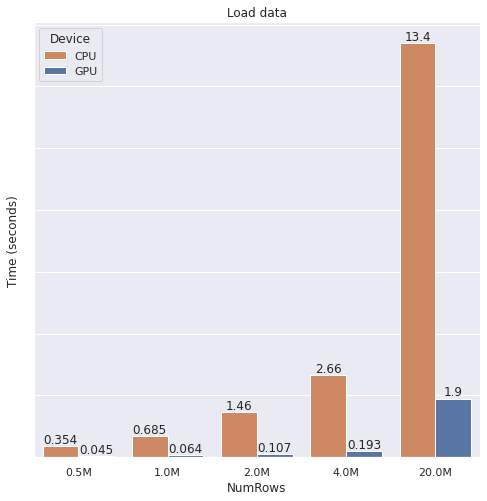

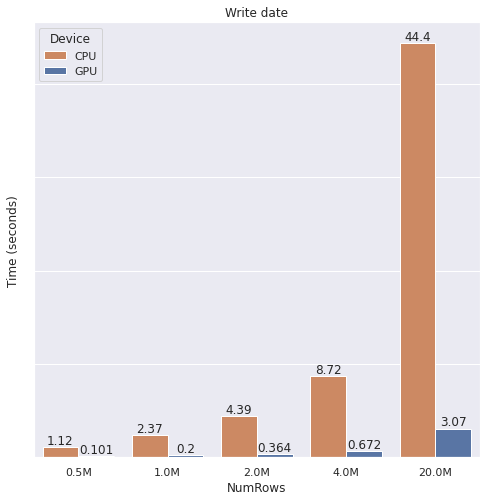

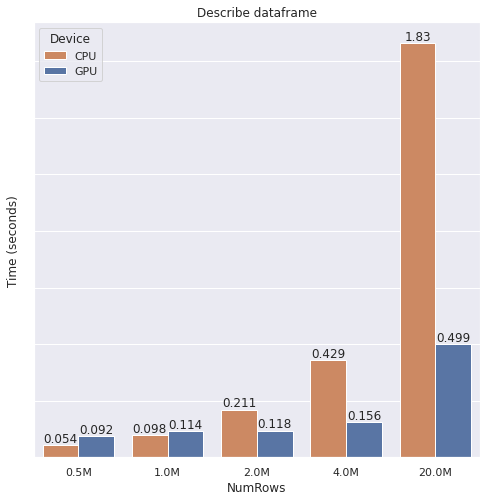

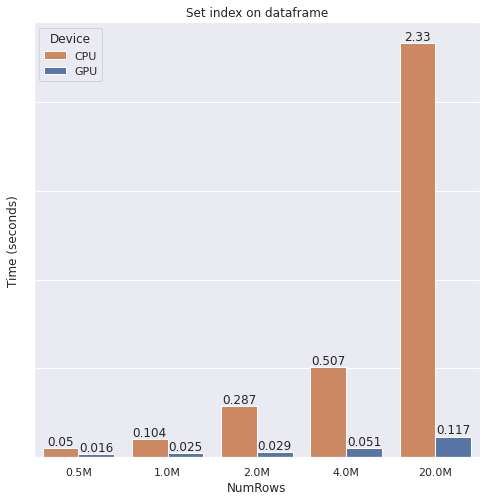

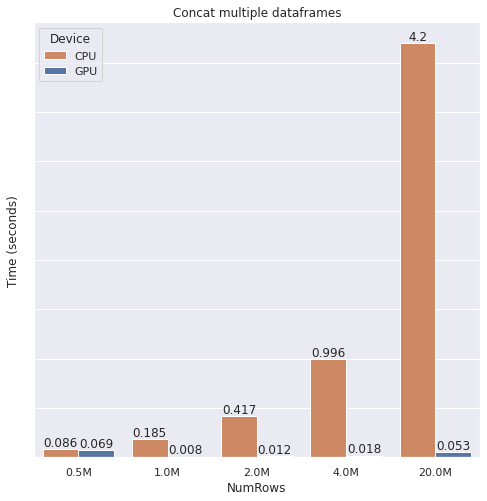

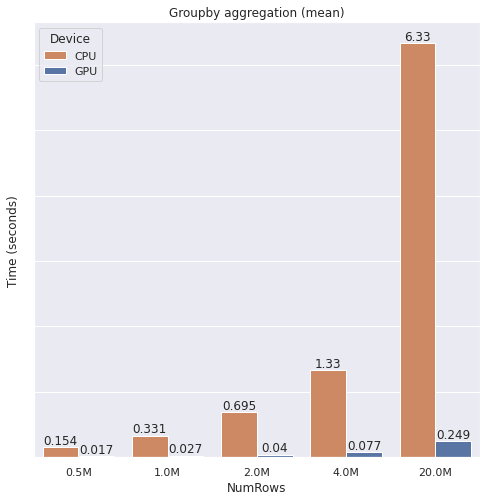

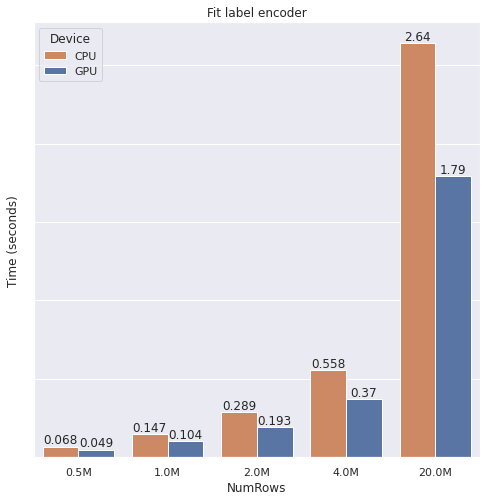

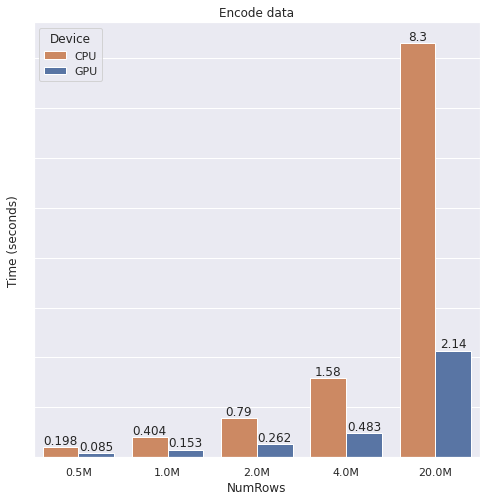

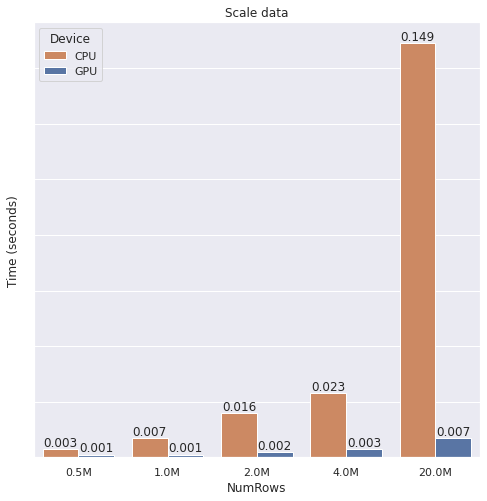

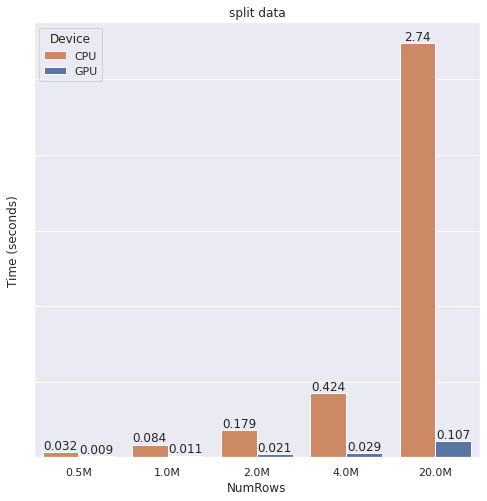

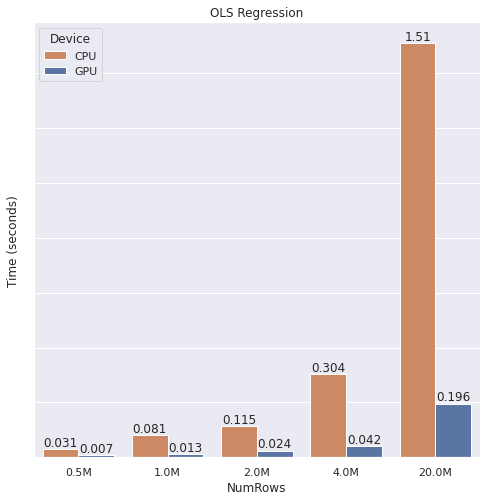

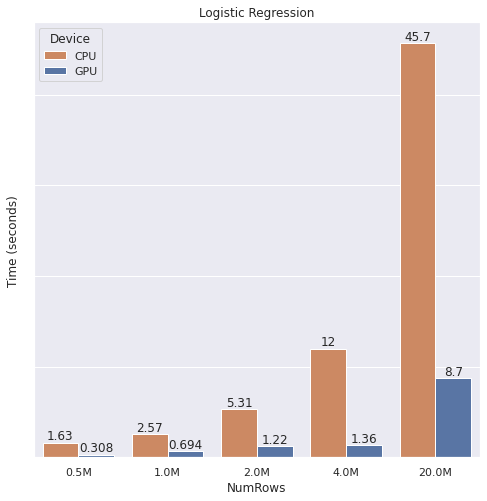

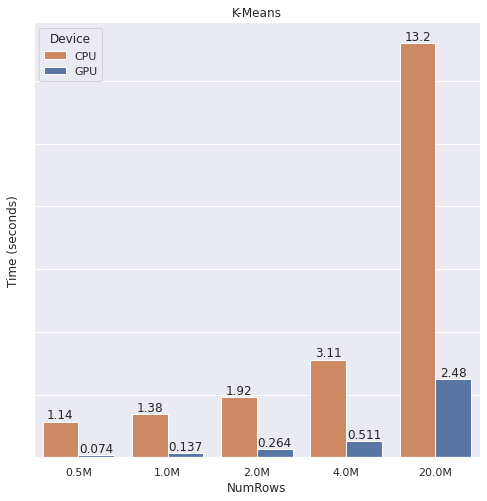

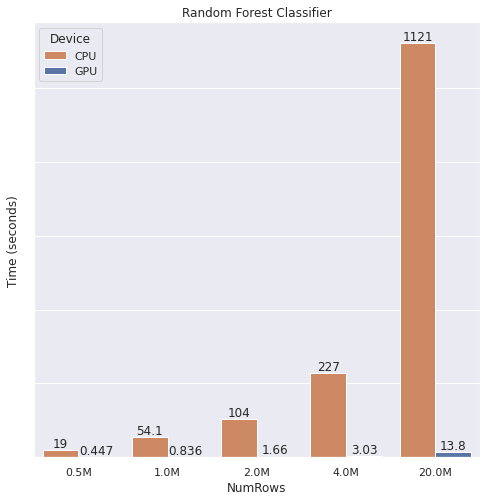

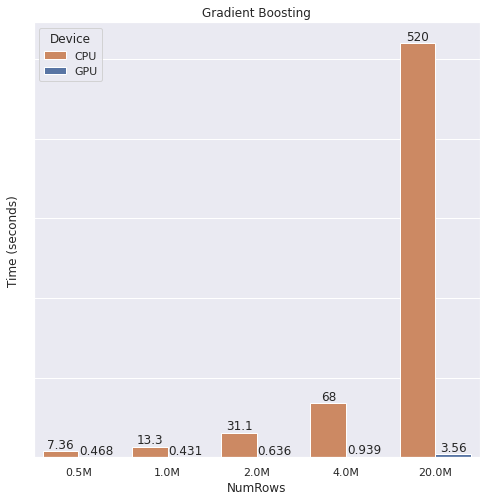

In [14]:
unq_tasks = df['Task'].unique()
for a_task in unq_tasks:
    cur_df = df[df['Task'] == a_task].copy()
    cur_df['Time (seconds)'] = cur_df['Time (seconds)'].round(3)
    fig = sns.barplot(data=cur_df, x='NumRows', y='Time (seconds)', hue='Device', palette=["C1", "C0"])
    fig.set_title(a_task)
    for container in fig.containers:
        fig.bar_label(container)
    fig.set(yticklabels=[])
    xlabels = [f'{x}M' for x in df['NumRows'].unique()/1000000]
    fig.set_xticklabels(xlabels)
    plt.savefig(f"./plots/{a_task.replace(' ', '_')}.png", bbox_inches='tight')
    plt.show()